In [1]:
import numpy as np
import pandas as pd

import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
stocks = input("enter the code of the stock :- ")
data = yf.download(stocks,"2020-01-01","2023-10-01",auto_adjust=True)
data

enter the code of the stock :- NG=F
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,2.184,2.188,2.116,2.122,164570
2020-01-03,2.129,2.163,2.083,2.130,144669
2020-01-06,2.112,2.173,2.099,2.135,154678
2020-01-07,2.149,2.178,2.102,2.162,163006
2020-01-08,2.153,2.185,2.115,2.141,242559
...,...,...,...,...,...
2023-09-25,2.657,2.671,2.606,2.639,36175
2023-09-26,2.638,2.667,2.552,2.656,57087
2023-09-27,2.656,2.781,2.640,2.764,136011


In [7]:
data.shape

(943, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 943 entries, 2020-01-02 to 2023-09-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    943 non-null    float64
 1   High    943 non-null    float64
 2   Low     943 non-null    float64
 3   Close   943 non-null    float64
 4   Volume  943 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 44.2 KB


In [9]:
data.describe()

,Open,High,Low,Close,Volume
count,943.000000,943.000000,943.000000,943.000000,943.000000
mean,3.826343,3.952966,3.699961,3.819952,137318.598091
std,2.020854,2.107422,1.933708,2.017857,58357.144224
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.391500,2.469000,2.317500,2.397000,101655.000000
50%,2.881000,2.971000,2.828000,2.888000,132424.000000
75%,5.020000,5.192000,4.847500,5.024000,167423.500000
max,9.817000,10.028000,9.200000,9.680000,381969.000000


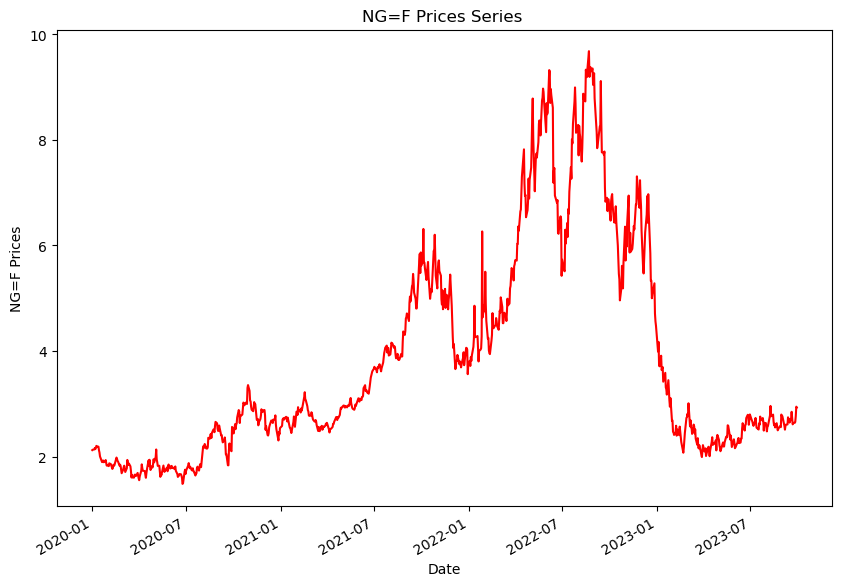

In [10]:
data.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Prices Series ".format(stocks))
plt.show()


C:\Users\91861\AppData\Local\Temp\ipykernel_15832\2693321050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

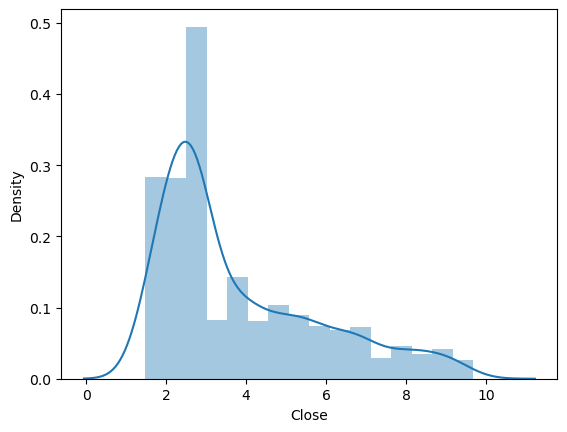

In [11]:
sns.distplot(data["Close"])

C:\Users\91861\AppData\Local\Temp\ipykernel_15832\3218051027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<Axes: xlabel='Open', ylabel='Density'>

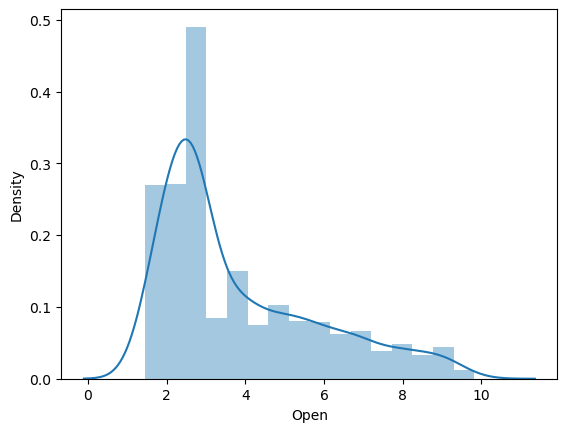

In [12]:
sns.distplot(data["Open"])

C:\Users\91861\AppData\Local\Temp\ipykernel_15832\3277148864.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: xlabel='High', ylabel='Density'>

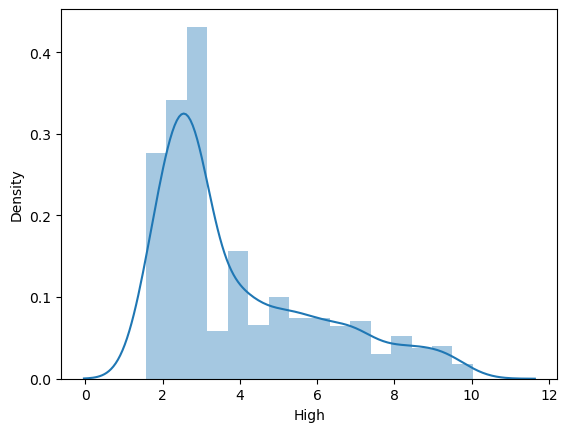

In [13]:
sns.distplot(data["High"])

In [19]:
# conclusions
#-shape of the data
#-hoe our data is distributed
#-it's very very non linear
#linear,logistic,Regularized,SVM
X = data.drop("Close",axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(y_test)

Date
2021-05-17    3.109
2023-06-27    2.763
2022-03-21    4.900
2022-08-25    9.375
2020-12-08    2.399
              ...  
2020-04-27    1.819
2022-07-21    7.932
2020-09-21    1.835
2023-09-20    2.733
2022-03-29    5.336
Name: Close, Length: 189, dtype: float64


In [18]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X_train,y_train)
pred1 = lr.predict(X_test)
pred1


array([3.06578629, 4.66872386, 2.78523308, 3.98972268, 3.65997158,
       2.31795798, 7.43134889, 1.91628431, 3.15196884, 9.80536249,
       1.68018089, 3.88472079, 2.72851729, 2.9847587 , 8.28356405,
       4.97046468, 2.7227658 , 1.83902015, 1.71906305, 4.66871224,
       4.10324783, 2.64832848, 2.54521617, 1.6465316 , 6.56498083,
       2.75607079, 4.68296794, 6.00012359, 3.26860118, 4.31686511,
       2.34514949, 5.65429887, 1.79280126, 2.66285235, 8.7643359 ,
       2.2088859 , 2.78500118, 1.72506445, 2.41732321, 7.73316605,
       1.86446616, 6.26896901, 1.73774232, 1.84263954, 3.01505566,
       6.09181677, 5.00051672, 1.83968965, 2.14695862, 2.18392871,
       2.17897464, 2.9456646 , 1.94989309, 1.8362591 , 2.22743563,
       3.78346856, 1.59170227, 3.90377857, 2.7117833 , 1.91496869,
       1.82940085, 3.74292286, 4.98844733, 1.6115584 , 2.11826578,
       1.77913073, 7.19662604, 2.56511448, 4.52888235, 2.58268328,
       3.04543398, 2.78422298, 4.05766317, 7.07424645, 3.33456

In [20]:
# MSE --> Mean Squared
# RMSE ----> sart(MSE)
# r2_score---> 1.0
from sklearn.metrics import mean_squared_error,r2_score
def calculate_metrics(y_test,y_pred):
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2_scores = r2_score(y_test, y_pred)
    print("MSE-> ", mse)
    print("RMSE-> ", rmse)
    print("r2_scores-> ", r2_scores)

    
    
calculate_metrics(y_test,pred1)

MSE->  8.199846310718303
RMSE->  2.8635373772169106
r2_scores->  -0.9898046240782965


In [22]:
from sklearn.linear_model import Lasso, Ridge

la=Lasso().fit(X_train, y_train)
ri=Ridge().fit(X_train,y_train)

la_p=la.predict(X_test)
ri_p= ri.predict(X_test)

In [23]:
calculate_metrics(y_test,la_p)

MSE->  0.2562186025607531
RMSE->  0.5061804051528991
r2_scores->  0.9378250590521611


In [24]:
calculate_metrics(y_test,ri_p)

MSE->  0.004497681385754469
RMSE->  0.06706475516807968
r2_scores->  0.998908576224495


In [25]:
ri_p

array([3.11311287, 2.77079429, 4.84445062, 9.34822489, 2.41551641,
       2.71356533, 8.14434489, 2.64767305, 1.95826476, 8.13893879,
       1.72194352, 2.94363293, 5.6646963 , 1.8647677 , 1.59025956,
       3.74660384, 2.83729391, 2.080898  , 8.72351188, 8.40197249,
       2.94910213, 1.9300419 , 2.73871144, 2.6349277 , 2.72965416,
       7.2286974 , 6.91561298, 2.58737079, 5.73133675, 2.59226515,
       1.84183446, 7.22944817, 2.2403225 , 2.57699962, 2.5480999 ,
       2.00273746, 2.23145172, 6.59564436, 1.52543037, 3.85103044,
       6.25247235, 2.96837519, 3.02972603, 2.88598095, 4.8679646 ,
       1.70409794, 2.52236689, 8.9983643 , 3.2894376 , 2.98993267,
       4.27583175, 3.24092569, 1.84426659, 5.20148259, 5.13205378,
       4.34079149, 3.58354866, 5.93920616, 6.42351613, 9.30354412,
       2.54252224, 2.48781398, 5.5489865 , 2.74730443, 3.94014987,
       7.62023628, 4.61991543, 7.96977036, 6.18684347, 2.28954958,
       6.19274305, 2.60595396, 4.0518136 , 6.36325082, 1.67753